In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/05.%20Week%205/Datasets/netflix_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Menghapus data kosong karena tidak memungkinkan untuk melakukan imputasi
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB


In [9]:
# Convert date_added to datetime (handling inconsistent formats)
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

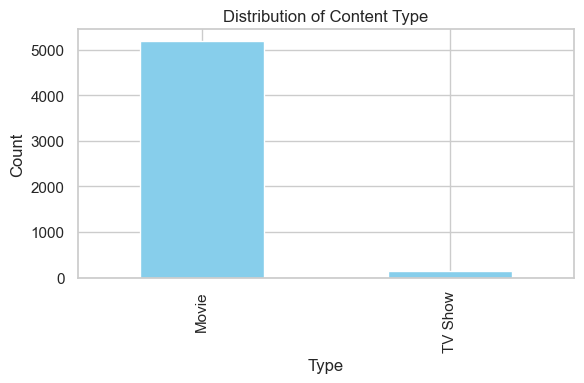

type
Movie      5185
TV Show     147
Name: count, dtype: int64


In [25]:
sns.set_theme(style="whitegrid")

# 1. Distribution of Type
plt.figure(figsize=(6,4))
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
print(df['type'].value_counts())


Dalam dataset ini, sebagian besar judul tontonan yang terdaftar berupa Movie atau Film, hanya 147 judul tontonan yang merupakan TV Show.

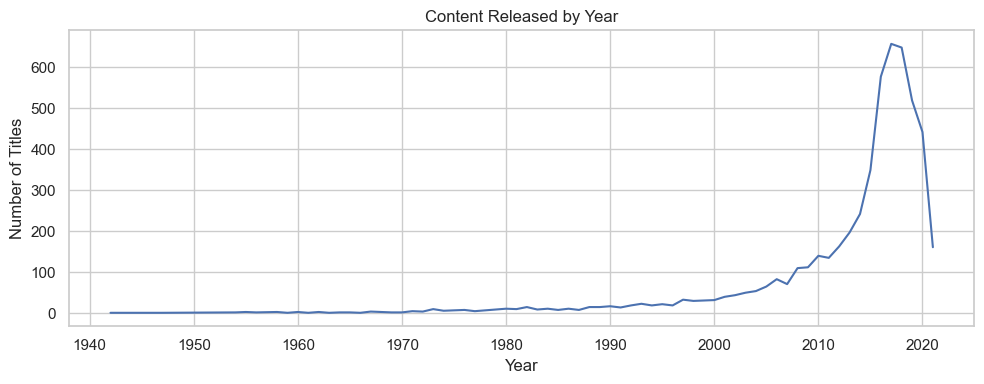

release_year
2017    657
2018    648
2016    577
2019    519
2020    442
       ... 
1946      1
1961      1
1942      1
1947      1
1944      1
Name: count, Length: 72, dtype: int64


In [21]:
# 2. Number of releases by year
plt.figure(figsize=(10,4))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Content Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()
print(df['release_year'].value_counts())

Berdasarkan grafik tersebut, judul tontonan yang rilis pada tahun 2000 ke atas mulai banyak ditambahkan ke Netflix. Tontonan yang rilis sekitar tahun 2017 sampai 2018 menjadi yang terbanyak ditambahkan, dengan jumlah masing-masing hampir 700 judul

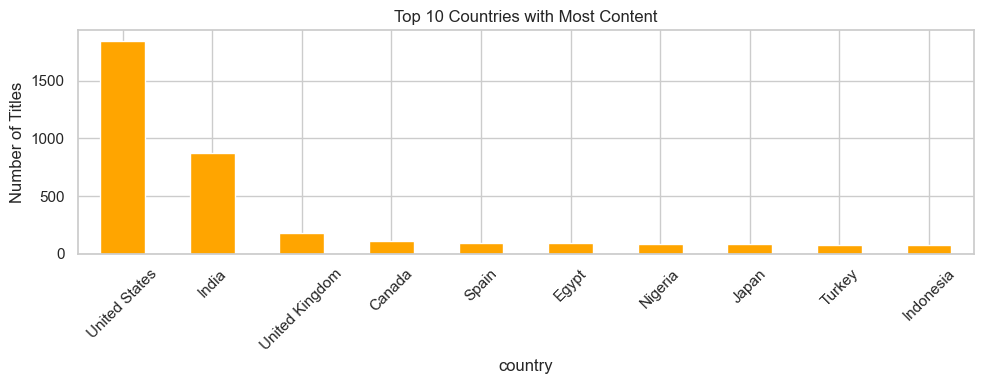

country
United States                                   1846
India                                            875
United Kingdom                                   183
Canada                                           107
Spain                                             91
                                                ... 
Uruguay, Guatemala                                 1
Romania, Bulgaria, Hungary                         1
Philippines, United States                         1
India, United Kingdom, Canada, United States       1
United Arab Emirates, Jordan                       1
Name: count, Length: 604, dtype: int64


In [22]:
# 3. Top 10 countries
plt.figure(figsize=(10,4))
df['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Countries with Most Content')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(df['country'].value_counts())

Serial Holywood menjadi yang paling banyak ditambahkan di sini dengan hampir 2000 judul. Diikuti dengan serial Bollywood, kemudian garapan Inggris, Canada, dan Spanyol. Hal ini bisa menjadi penanda bahwa tontonan buatan kelima negara itu menjadi yang paling diminati oleh pengguna Netflix.

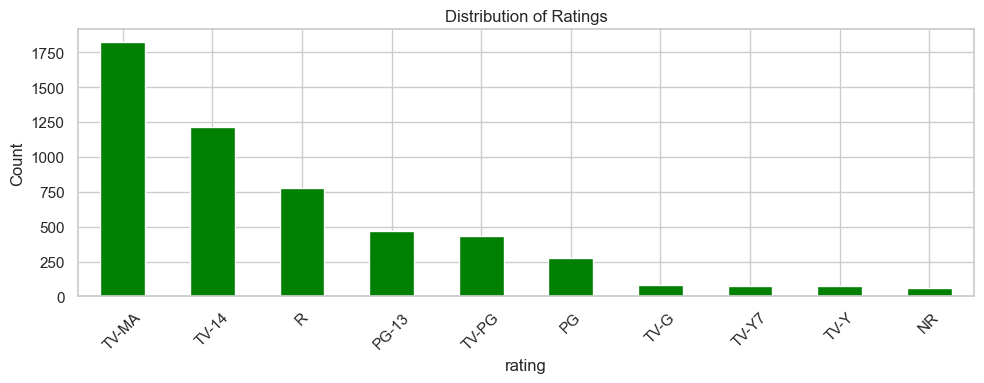

In [15]:
# 4. Rating distribution
plt.figure(figsize=(10,4))
df['rating'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Distribution of Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

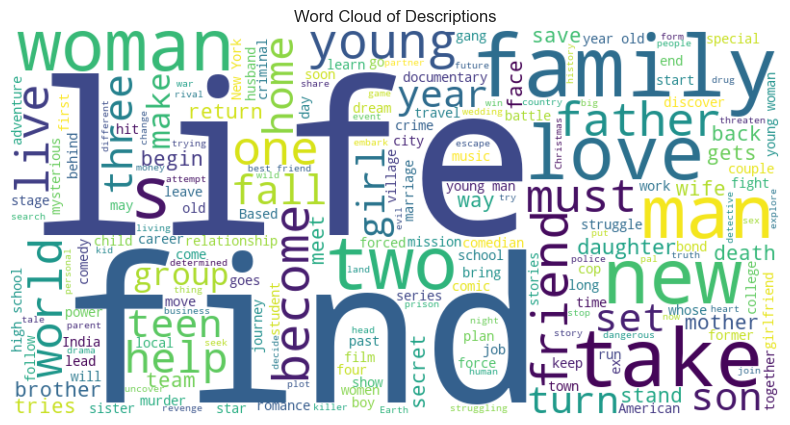

In [27]:
# 5. Word Cloud of Description
text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()

Wordcloud di sini digunakan untuk memvisualisasikan kata yang sering muncul pada deskripsi tontonan Netflix yang ada pada dataset ini. Di sini kita bisa melihat bahwa kata Life diperlihatkan dengan font yang paling besar, diikuti dengan kata Find dan Family. Kita bisa berasumsi bahwa mayoritas tontonan yang ditambahkan pada Netflix memiliki tema tentang Kehidupan secara umum dan bertemakan Keluarga.

Jumlah Kata:  
\[ \text{Jumlah Kata} = \text{len}(\text{description.split()}) \]  
Menghitung jumlah kata dalam deskripsi tiap tayangan Netflix.